In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
% matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
# type 2 has some null values. we need to fill them with type 1
df['Type 2'].fillna(df['Type 1'],inplace=True)

In [5]:
df.info() # null values  filled with corressponding type 1 values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        800 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [6]:
#df.head()
# can drop # as indexing is already done
del df['#']
df.head()


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False


In [7]:
df.columns.unique()

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

######  now we can see the types and distribution of various categorical features.

In [8]:
# consider type 1
df['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

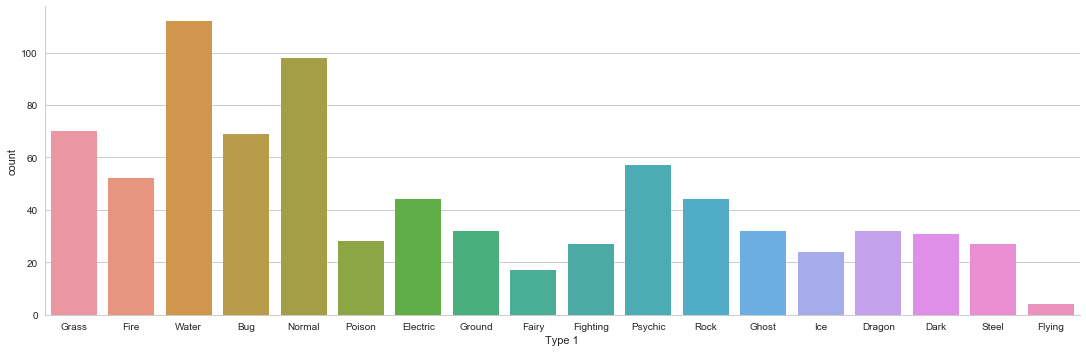

In [9]:
# a count plot to better visualize.
sns.factorplot(x='Type 1',kind='count',data=df,size=5,aspect=3)

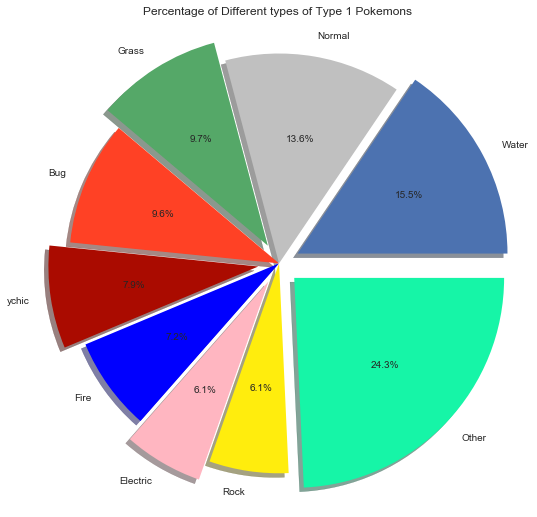

In [10]:
# a pie to visulaize the relative proportions.
labels = ['Water', 'Normal', 'Grass', 'Bug', 'ychic', 'Fire', 'Electric', 'Rock', 'Other']
sizes = [112, 98, 70, 69, 57, 52, 44, 44, 175]
colors = ['B', 'silver', 'G', '#ff4125', '#aa0b00', '#0000ff','#FFB6C1', '#FFED0D', '#16F5A7']
explode = (0.1, 0.0, 0.1, 0, 0.1, 0.0, 0.1, 0, 0.1) 
plt.pie(x=sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=0,counterclock=True)
plt.axis('scaled')
plt.title("Percentage of Different types of Type 1 Pokemons")
fig=plt.gcf()
fig.set_size_inches(9,9)
plt.show()

In [11]:
# consider type 2
df['Type 2'].value_counts()

Flying      99
Water       73
Psychic     71
Normal      65
Grass       58
Poison      49
Ground      48
Fighting    46
Fire        40
Fairy       38
Electric    33
Dark        30
Dragon      29
Ice         27
Steel       27
Ghost       24
Rock        23
Bug         20
Name: Type 2, dtype: int64

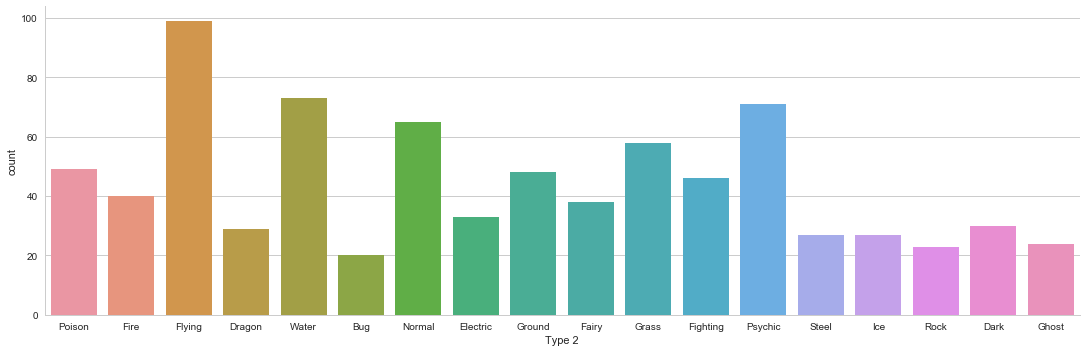

In [12]:
# agin a countplot.
sns.factorplot(x='Type 2',kind='count',data=df,size=5,aspect=3)

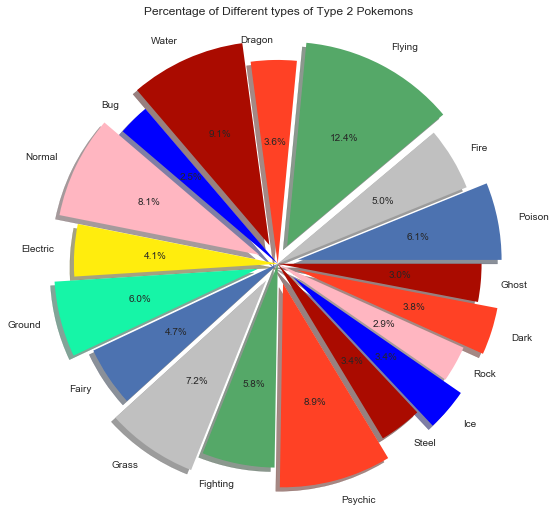

In [13]:
# similarly a pie chart for type 2
labels = ['Poison', 'Fire', 'Flying', 'Dragon', 'Water', 'Bug', 'Normal',
       'Electric', 'Ground', 'Fairy', 'Grass', 'Fighting', 'Psychic',
       'Steel', 'Ice', 'Rock', 'Dark', 'Ghost']
sizes = [49,40,99,29,73,20,65,33,48,38,58,46,71,27,27,23,30,24]
colors = ['B', 'silver', 'G', '#ff4125', '#aa0b00', '#0000ff','#FFB6C1', '#FFED0D', '#16F5A7','B', 'silver', 'G', '#ff4125', '#aa0b00', '#0000ff','#FFB6C1','#ff4125', '#aa0b00']
explode = (0.1, 0.0, 0.1, 0, 0.1, 0.0, 0.1, 0, 0.1,0.0,0.1,0.0,0.1,0.0,0.1,0.0,0.1,0.0)
plt.pie(x=sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=0,counterclock=True)
plt.axis('scaled')
plt.title("Percentage of Different types of Type 2 Pokemons")
fig=plt.gcf()
fig.set_size_inches(9,9)
plt.show()

In [14]:
df['Legendary'].value_counts() # implies most of the pokemons were not legendary

False    735
True      65
Name: Legendary, dtype: int64

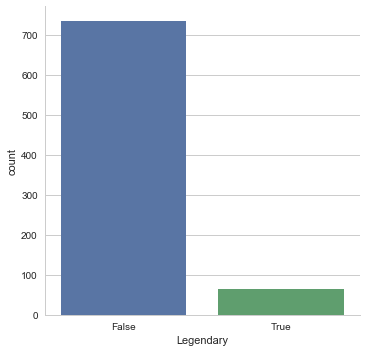

In [15]:
sns.factorplot(x='Legendary',kind='count',data=df,size=5,aspect=1)

In [16]:
# similarly for Generation
df['Generation'].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

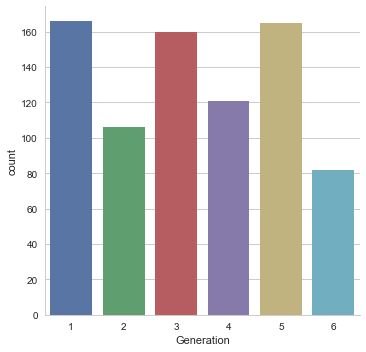

In [17]:
sns.factorplot(x='Generation',kind='count',data=df,size=5,aspect=1)

In [18]:
# viewing the descriptive measures of various  numeric features
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


######  we have now considered each feature one by one and seen its types and distribution.

######  now we can depict the  distribution of various other features. or more specifically numeric features.

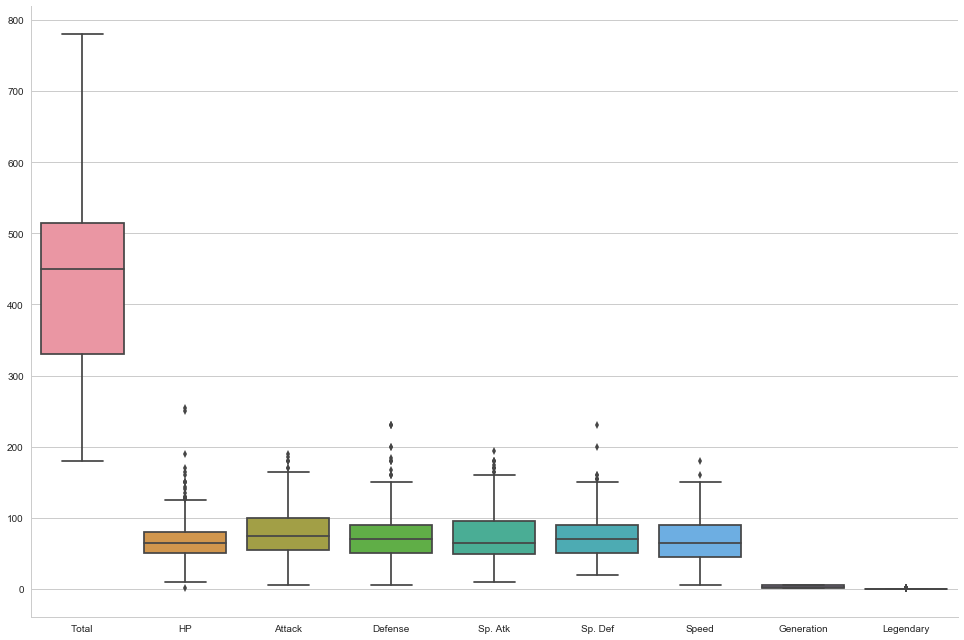

In [19]:
sns.factorplot(data=df,kind='box',size=9,aspect=1.5)

######  TO INTERPRET THE BOXPLOT---     

1. the bottom line shows the min value of a particular numeric feature.
2. the upper line tells the max value.
3. the middle line of the box is the median or the 50% percentile.
4. the side lines of the box are the 25 and 75 percentiles respectively.

######  the above boxplot clearly shows the variation of various numeric features. For eg- consider Total. The df.describe() shows that median  (50%) of Total is 450 and this is also clearly evident from the boxplot corressponding to Total.  

###### we can now depict the corelation b/w the various features using a corelation map.

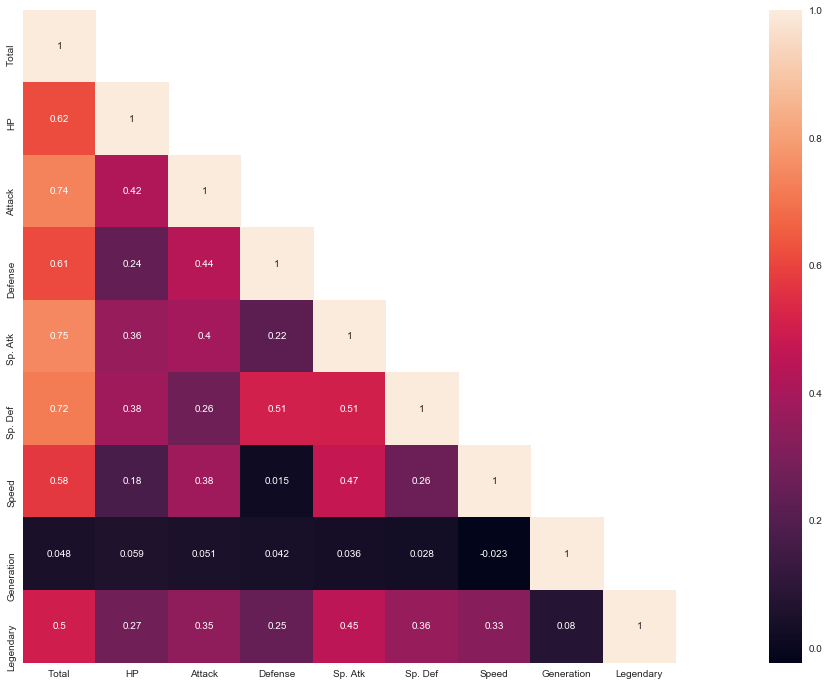

In [20]:
cor_mat= df[['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,vmax=1.0, square=True,annot=True,cbar=True) 

###### BREAKING IT DOWN--
1. firstly calling .corr() method on a pandas data frame returns a corelation data frame containing the corelation values b/w the various attributes.


2. now we obtain a numpy array from the corelation data frame using the np.array method.


3. nextly using the np.tril_indices.from() method we set the values of the lower half of the mask numpy array to False.
this is bcoz on passing the mask to heatmap function of the seaborn it plots only those squares whose mask is False.     therefore if we don't do this then as the mask is by default True then no square will appear. 
Hence in a nutshell we obtain a numpy array from the corelation data frame and set the lower values to False so that we can visualise the corelation. In order for a full square just use the [:] operator in mask in place of tril_ind... function.


4. in next step we get the refernce to the current figure using the gcf() function of the matplotlib library and set the figure size.


5. in last step we finally pass the necessary parameters to the heatmap function.

   DATA=the corelation data frame containing the 'CORELATION' values.
   
   MASK= explained earlier.
   
   vmin,vmax= range of values on side bar
   
   SQUARE= to show each individual unit as a square.
   
   ANNOT- whether to dispaly values on top of square or not. In order to dispaly pass it either True or the cor_mat.
   
   CBAR= whether to view the side bar or not.

######  NOW FINALLY INFERENCES FROM THE PLOT ::)
 for simplicity I have again plotted the plot.

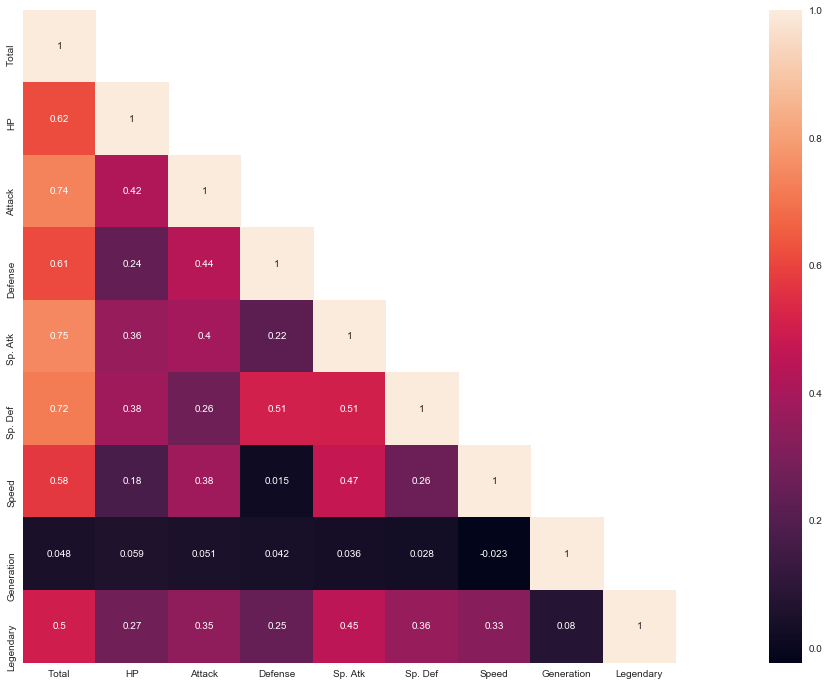

In [21]:
cor_mat= df[['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,vmax=1.0, square=True,annot=True,cbar=True) 

######  1. firstly note that generation doesnt have any corelation with any other feature. so we can drop it iff we want. 

###### 2. also note that 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed' are highly correlated to total.

###### 3. self realtion i.e. of a feature to itself is always 1.0 .

###### 4. note that the corelation of A->B is always equal to that of B->A which is quite obvious and is evident from the below heatmap.

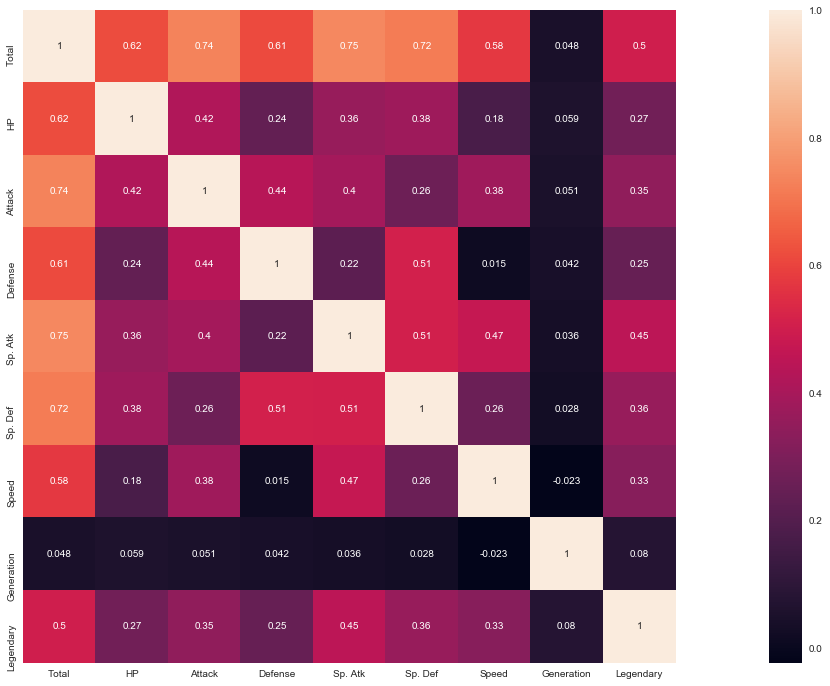

In [22]:
# just to show full square. ::)))
cor_mat= df[['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']].corr()
mask = np.array(cor_mat)
mask[:] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,vmax=1.0, square=True,annot=True,cbar=True) 

###### now let us see the variation of variables with Type 1

In [23]:
# similarly we can do this for type 2.

In [24]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False


In [25]:
# we can make a function that take 2 arguements -- the independent variable and the dependent variable.
# the dependent variable will be the categorical variable such as the type 1 or type 2 against which we want to plot--
# the independent variable which will be the numeric variable which we want to plot against the categorical variable.

def comp_against(dep_cat,indep_num,dfd):
#     fig, axes = plt.subplots(3,1)
#     fig.set_size_inches(15, 12)
    sns.factorplot(x=dep_cat,y=indep_num,data=dfd,kind='bar',size=5,aspect=3)
    sns.factorplot(x=dep_cat,y=indep_num,data=dfd,kind='swarm',size=5,aspect=3)
    sns.factorplot(x=dep_cat,y=indep_num,data=dfd,kind='box',size=5,aspect=3)
    sns.factorplot(x=dep_cat,y=indep_num,data=dfd,kind='strip',size=5,aspect=3)
    sns.factorplot(x=dep_cat,y=indep_num,data=dfd,kind='violin',size=5,aspect=3)

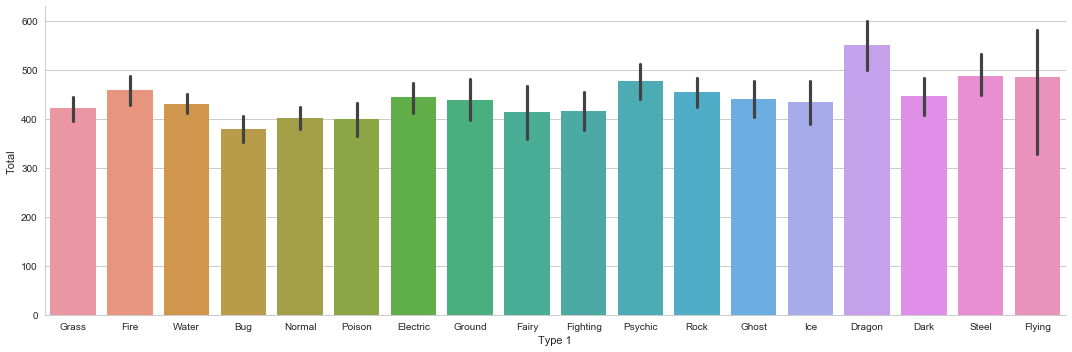

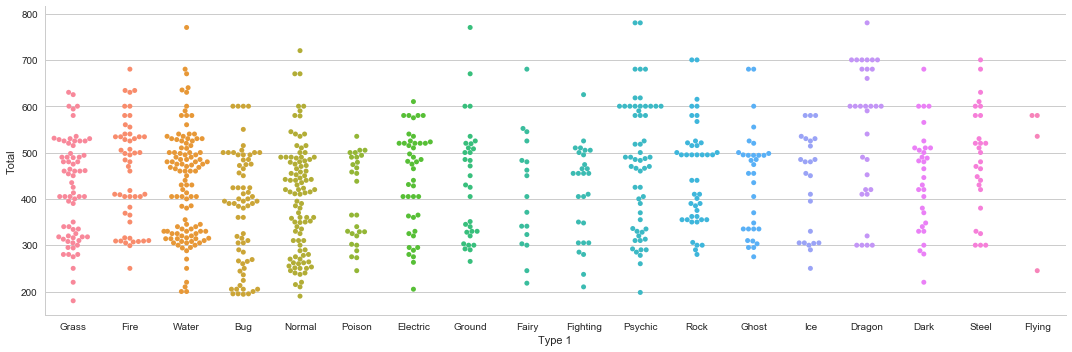

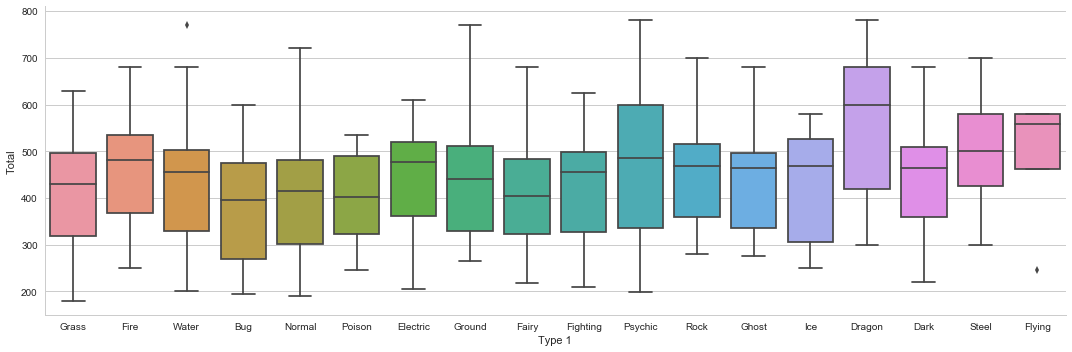

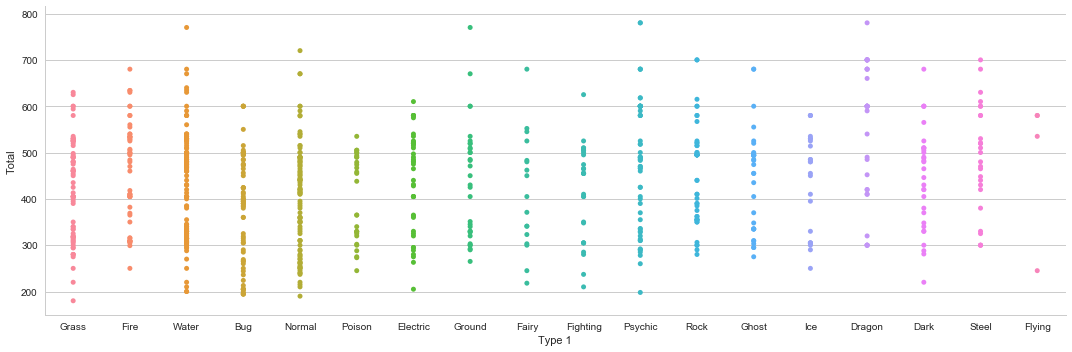

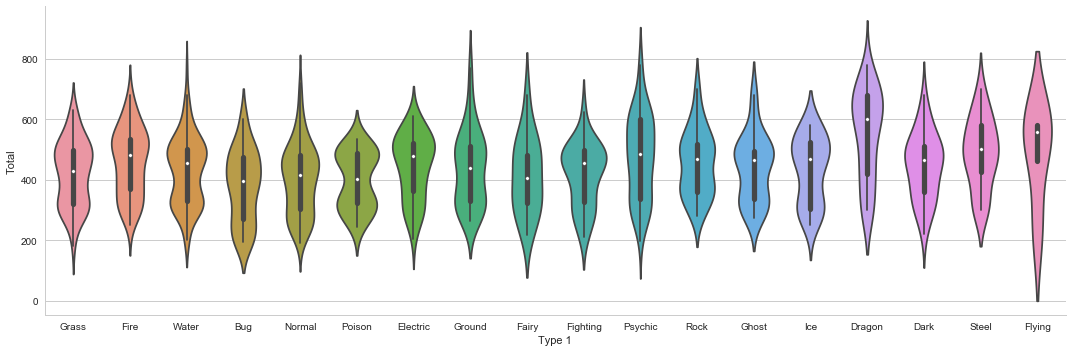

In [26]:
# now we can call the function like this. Below I have used Type 1 like a dep variable. Similarly we can do for others.
comp_against('Type 1','Total',df)

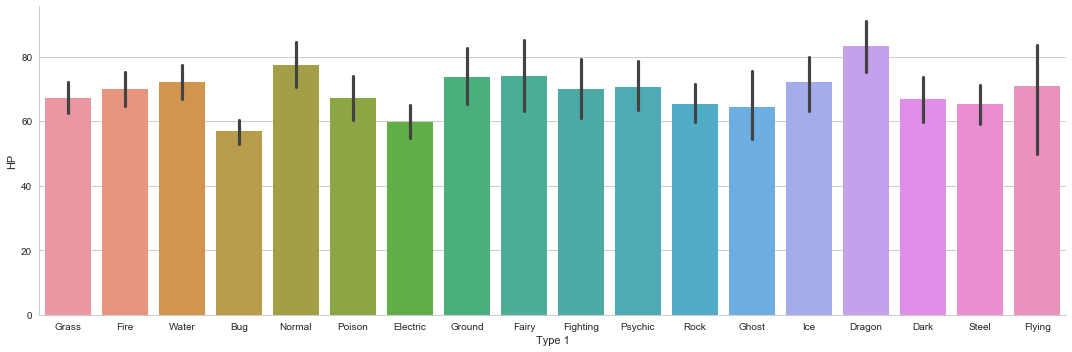

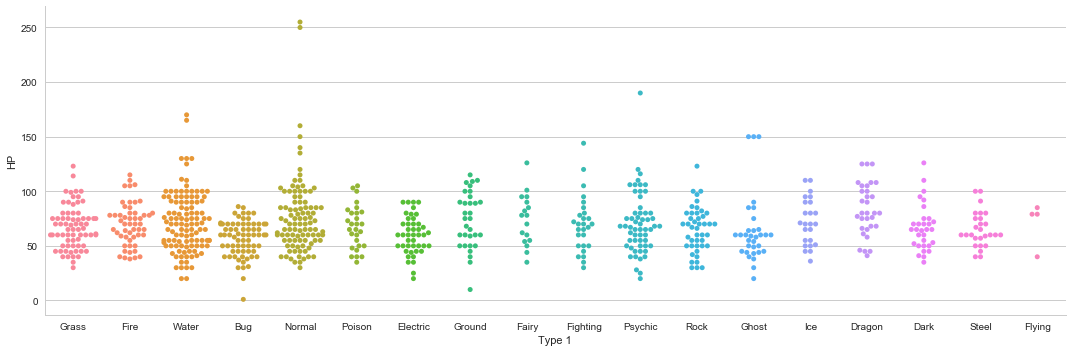

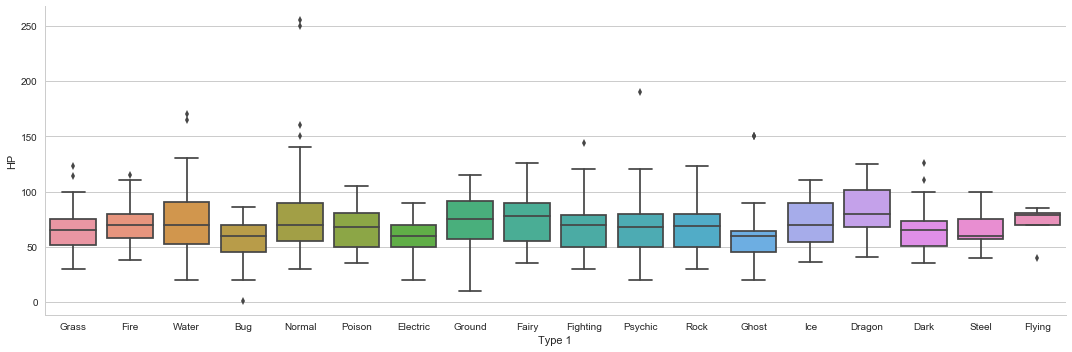

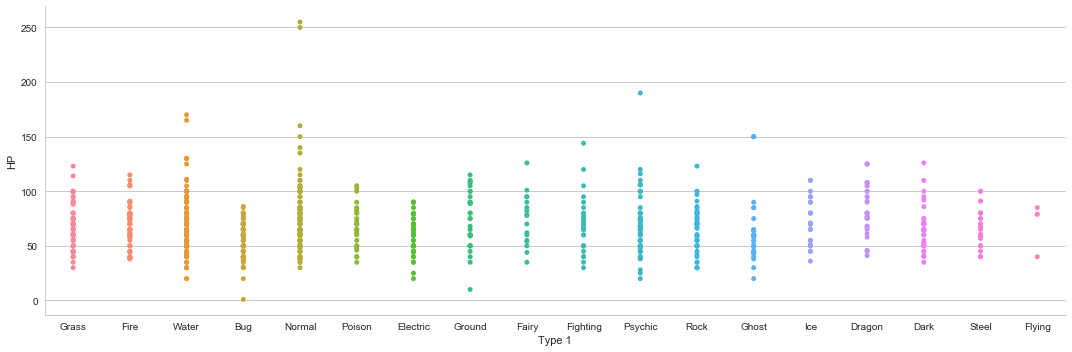

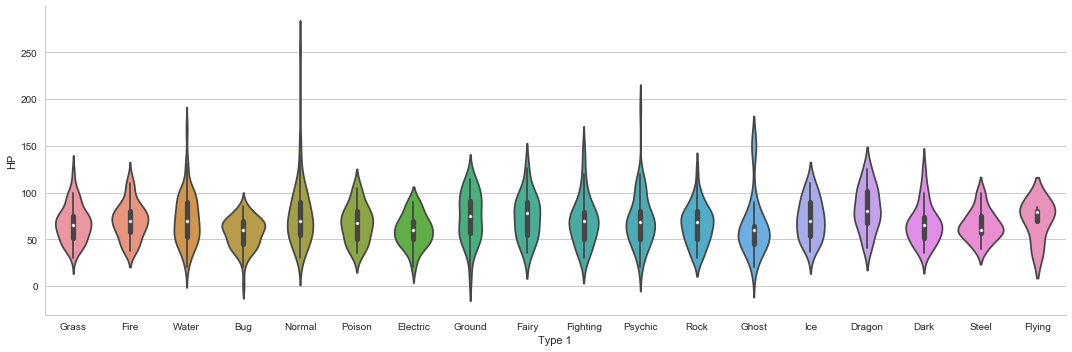

In [27]:
comp_against('Type 1','HP',df)

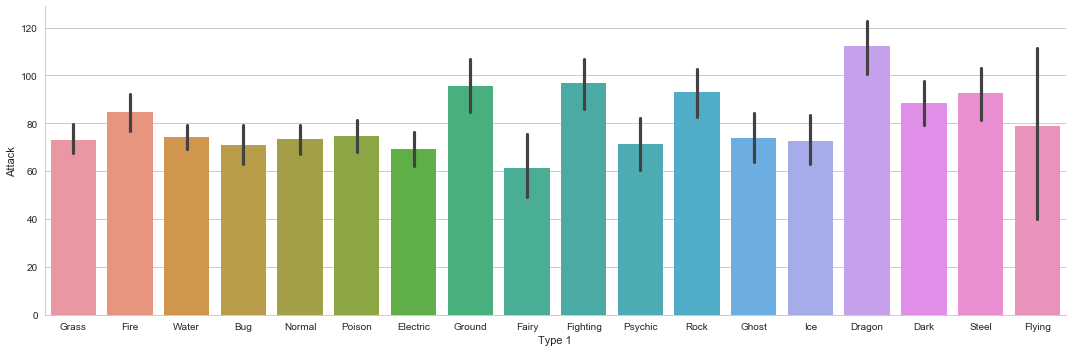

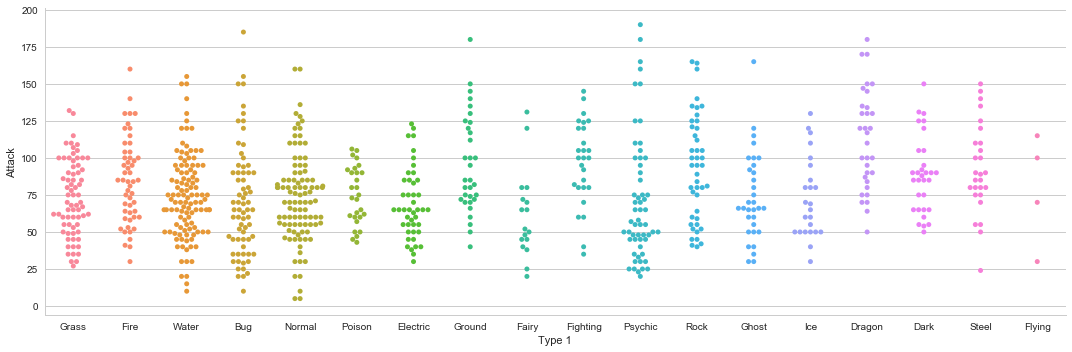

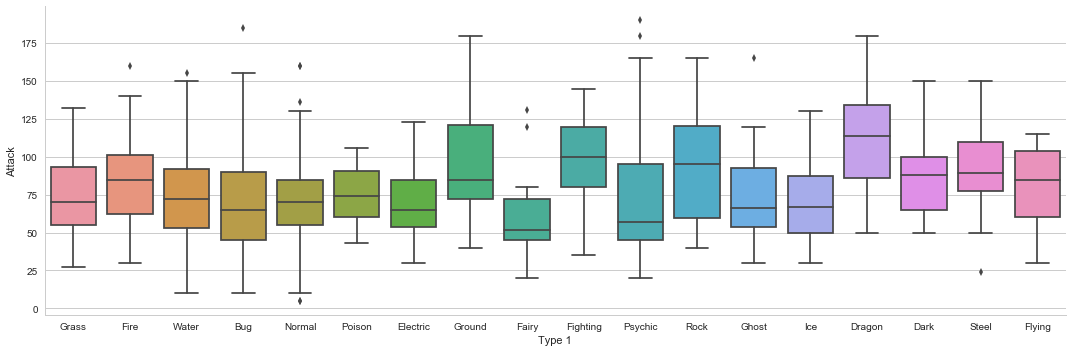

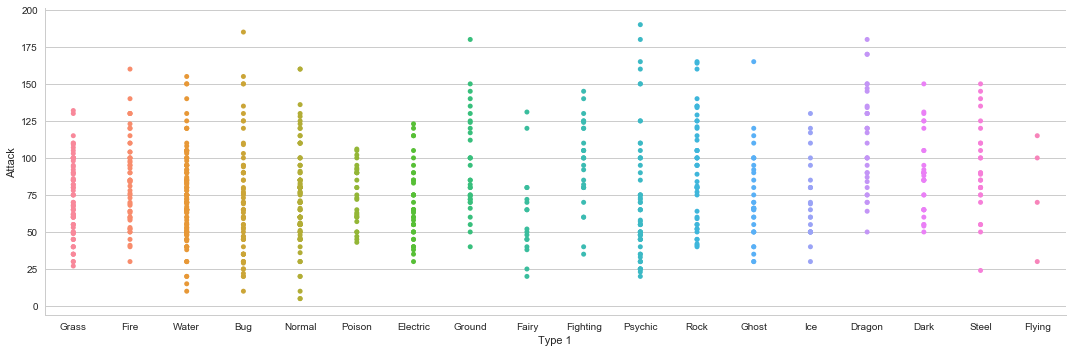

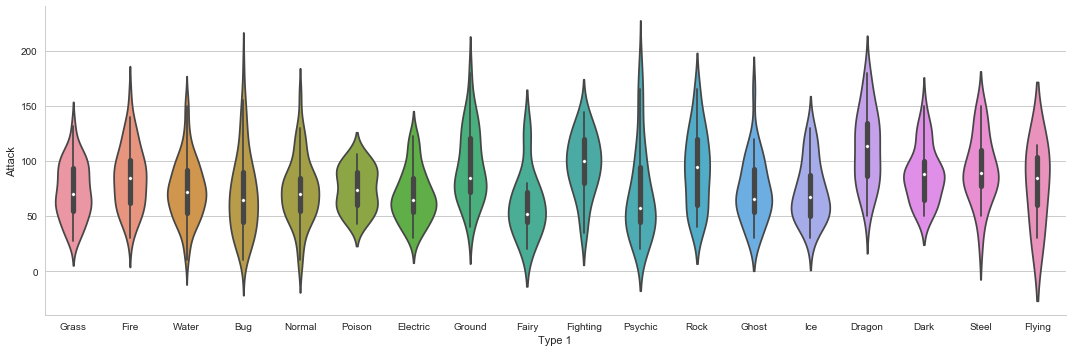

In [28]:
comp_against('Type 1','Attack',df)

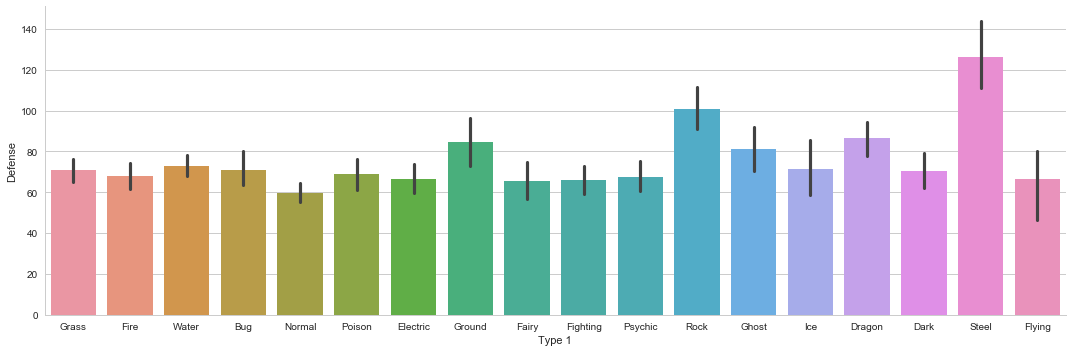

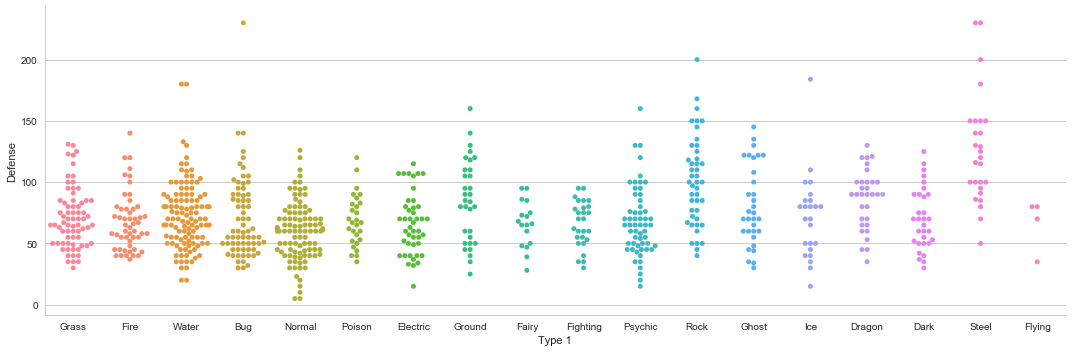

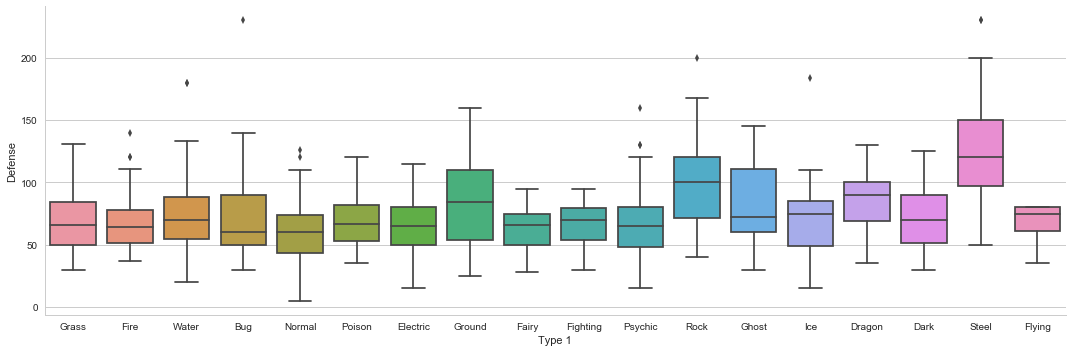

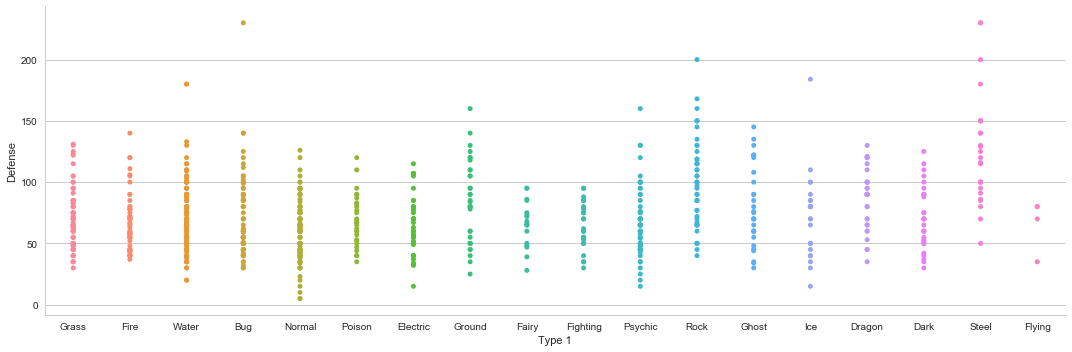

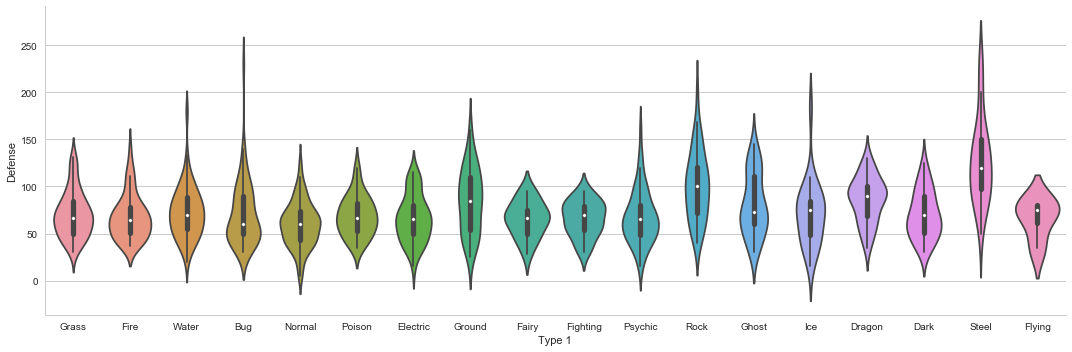

In [29]:
comp_against('Type 1','Defense',df)

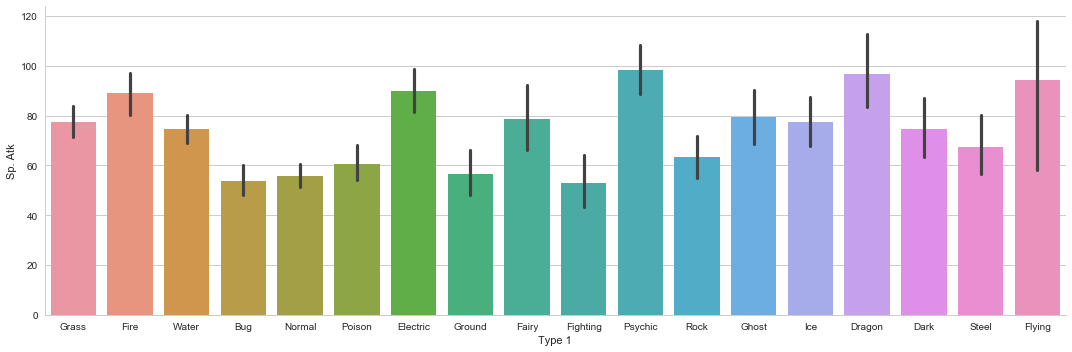

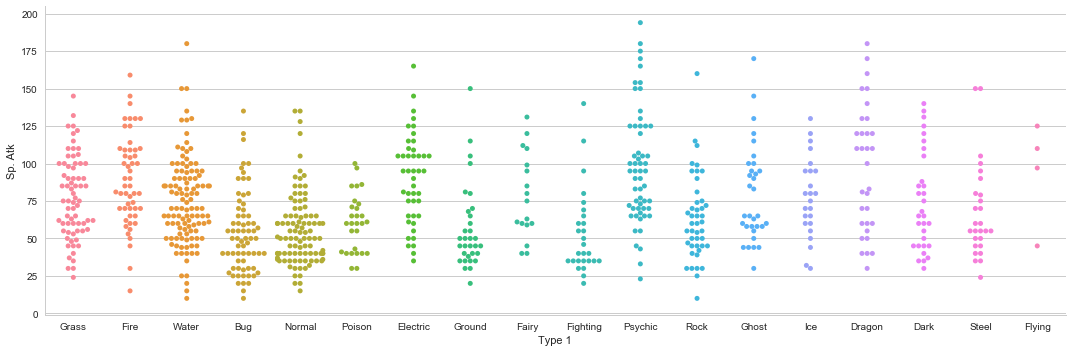

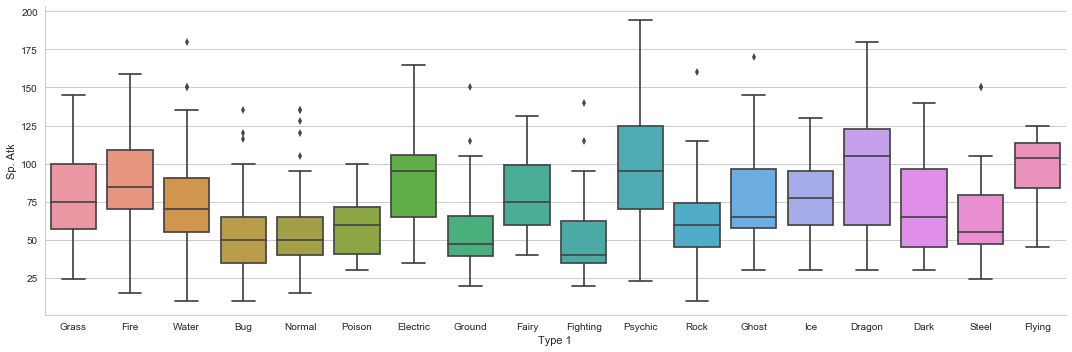

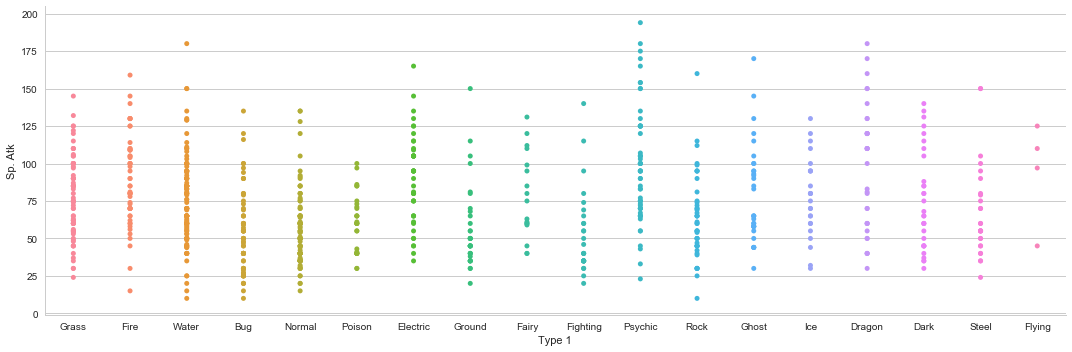

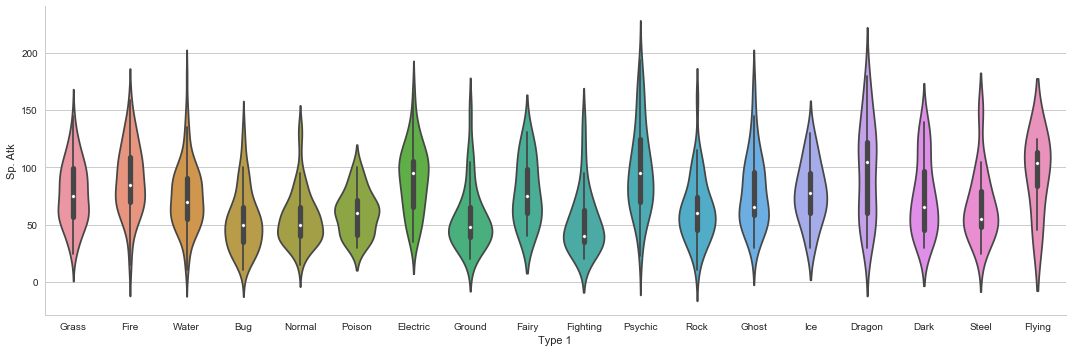

In [30]:
comp_against('Type 1','Sp. Atk',df)

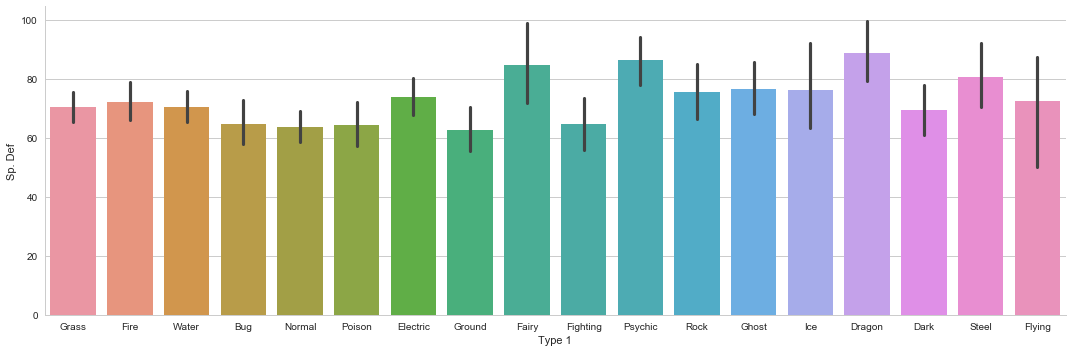

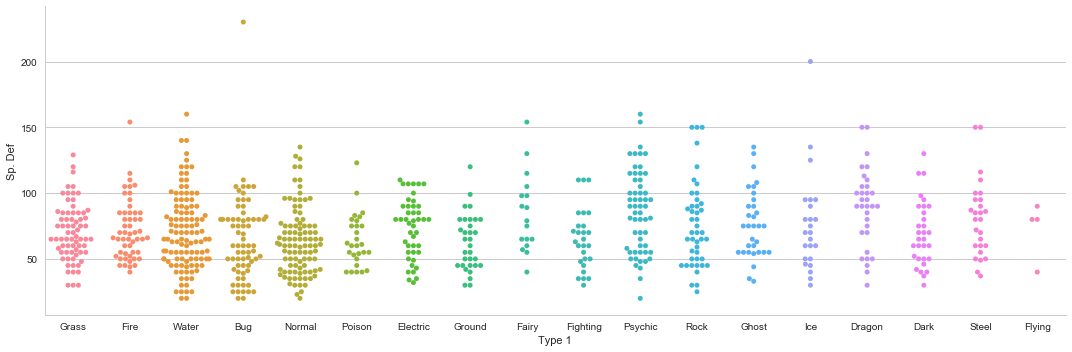

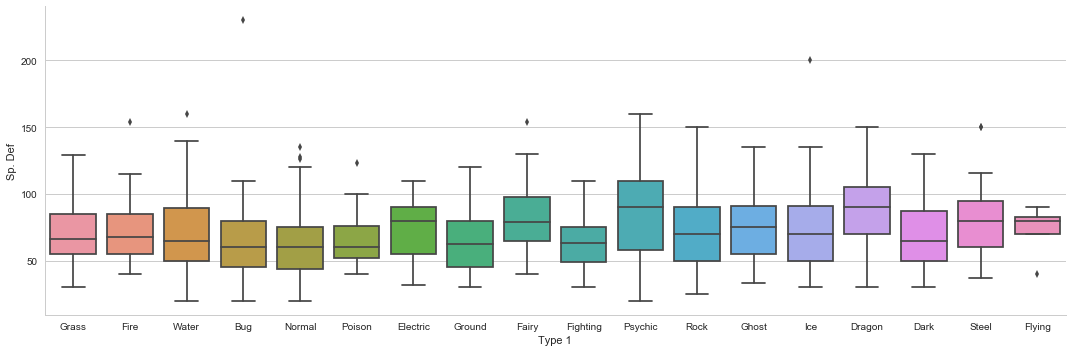

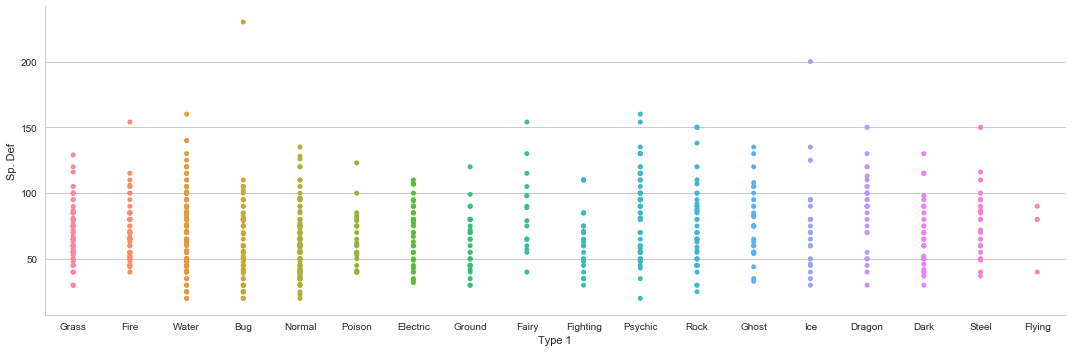

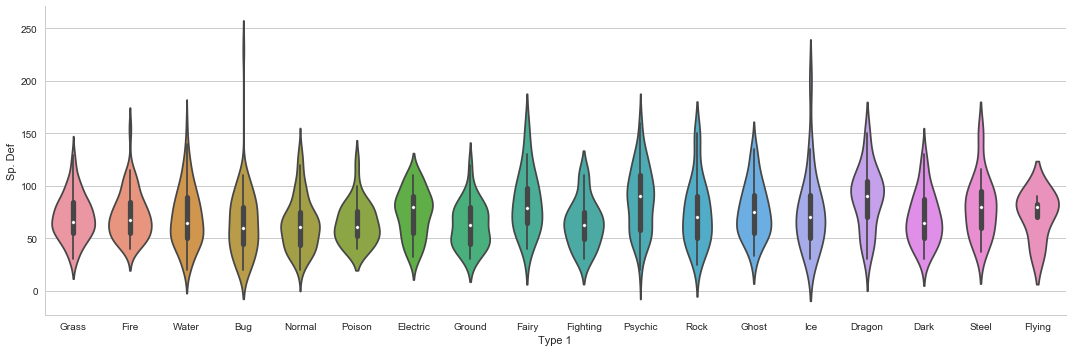

In [31]:
comp_against('Type 1','Sp. Def',df)

In [32]:
# now similarly we can change the categorical variable like Type 2 etc... 
# and plot various numeric features like Total ,HP etc etc... .

######  Lastly we can also compare two pokemons. The function takes the  names of two pokemons and the parameter as input and compares them with on different aspects.

In [33]:
def comp_pok(name1,name2,param):
    a = df[(df.Name == name1) | (df.Name ==name2)]
    sns.factorplot(x='Name',y=param,data=a,kind='bar',size=5,aspect=1,palette=['#0000ff','#FFB6C1'])
    

In [34]:
# calling the function with differnt paraemters for two dummy pokemons ---   Bulbasaur and Ivysaur

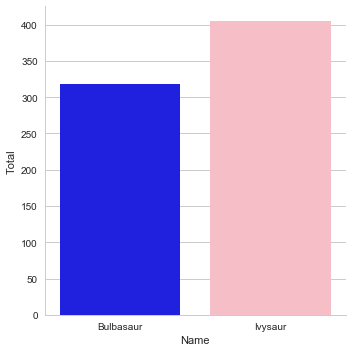

In [35]:
comp_pok('Bulbasaur','Ivysaur','Total')

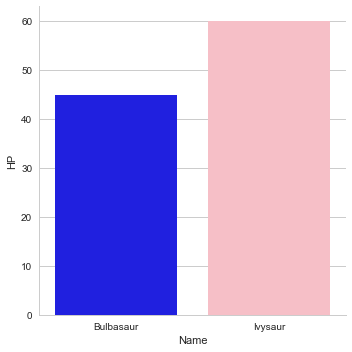

In [36]:
comp_pok('Bulbasaur','Ivysaur','HP')

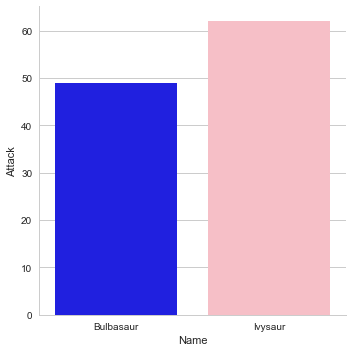

In [37]:
comp_pok('Bulbasaur','Ivysaur','Attack')

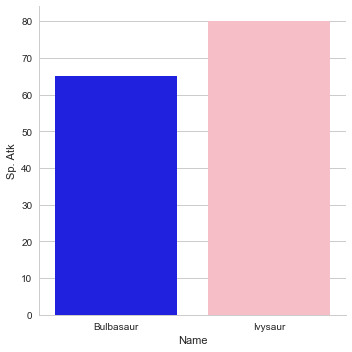

In [38]:
comp_pok('Bulbasaur','Ivysaur','Sp. Atk')

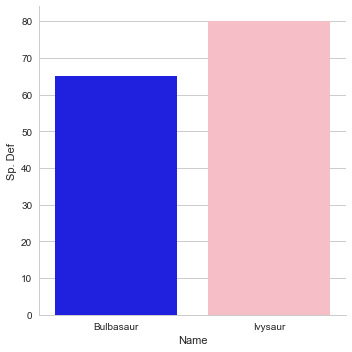

In [39]:
comp_pok('Bulbasaur','Ivysaur','Sp. Def')

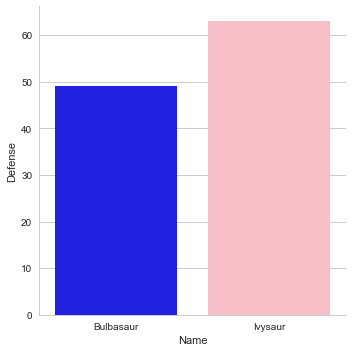

In [40]:
comp_pok('Bulbasaur','Ivysaur','Defense')  

In [42]:
# and similarly... we can pass the names of the pokemons and the parameter to compare for any 2 pokemons.

# THE END.